In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

def onsager(z, r, tau):
    return (z/n) * np.sum(eta(r, tau) != 0)

def eta(u, T):
    return (u - T)*(u >= T) + (u + T)*(u <= -T)

In [8]:
n = 270
N = 1024
k = 40
num_iterations = 5
s = 0.2
lambda_ = 0.1

# create sensing matrix A
A = np.sqrt(1/n)*np.random.randn(n, N)

# create k sparse x vector
x = np.zeros((N, 1))
idx_nonzero_entries = np.random.permutation(N)[0:k]
x[idx_nonzero_entries] = 1

y = A @ x

md = np.zeros(0)
md_cnt = 0
fa = np.zeros(0)
fa_cnt = 0

In [63]:
non_zerox = np.where(x)[0]
# IST
xHt = np.zeros(x.shape)
for j in range(1, num_iterations + 1):
    for idx_iter in range(j):
        z = y - A @ xHt
        r = xHt + s * A.T @ z
        xHt = eta(r, s*lambda_)
    # hard decision
    xHt = (abs(xHt) > .5)
    
    for i in non_zerox:
        if xHt[i] == 1:
            xHt[i] = 0  # this makes it easy to count FA
        else:
            md_cnt += 1
    fa_cnt = np.sum(xHt)
    md = np.append(md, md_cnt)
    fa = np.append(fa, fa_cnt)
    # reset counts
    md_cnt = 0
    fa_cnt = 0

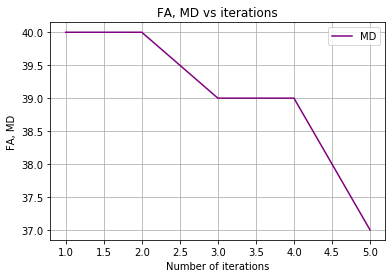

n = 270 | N = 1024 | k = 40
[40. 40. 39. 39. 37.]


In [65]:
plt.figure()
plt.plot(range(1,num_iterations+1), md, label="MD", color="purple")
#plt.plot(range(1,num_iterations+1), fa, label="FA", color="red")
plt.title("FA, MD vs iterations")
plt.xlabel("Number of iterations")
plt.ylabel("FA, MD")
plt.legend()
plt.grid(True, which='both')
plt.show()
print(f'n = {n} | N = {N} | k = {k}')

print(md)
#print(fa)

In [4]:
x_mat = []
y_mat = []
for k in [1, 5, 10, 40, 60, 80, 100, 200, 500, 600]:
    # create k sparse x vector
    x = np.zeros((N, 1))
    idx_nonzero_entries = np.random.permutation(N)[0:k]
    x[idx_nonzero_entries] = 1
    x_mat.append(x)
    
    y = A @ x
    y_mat.append(y)
    

In [35]:
num_layers = 1
md =[]
for k in [1, 5, 10, 40, 60, 80, 100, 200, 500, 600]:
    # create k sparse x vector
    x = np.zeros((N, 1))
    idx_nonzero_entries = np.random.permutation(N)[0:k]
    x[idx_nonzero_entries] = 1
    
    y = A @ x
    
    non_zerox = np.where(x)[0]
    xHt = np.zeros(x.shape)
    # IST
    for idx_iter in range(num_layers):
        z = y - A @ xHt
        r = xHt + s * A.T @ z
        xHt = eta(r, s*lambda_)
    # hard decision
    xHt = (abs(xHt) > .5)
#     print(non_zerox)
#     print(np.where(xHt)[0])
#     print('\n')

    for q in non_zerox:
        if xHt[q] != 1:
            md_cnt += 1
    md.append(md_cnt)
        # reset counts
    md_cnt = 0

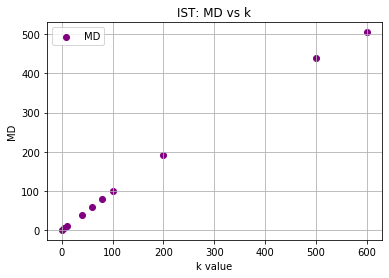

Number of layers = 1
Misdetection values [1, 5, 10, 40, 60, 79, 99, 193, 439, 505]


In [36]:
plt.figure()
plt.scatter([1, 5, 10, 40, 60, 80, 100, 200, 500, 600], md, label="MD", color="purple")
plt.title("IST: MD vs k")
plt.xlabel("k value")
plt.ylabel("MD")
plt.legend()
plt.grid(True, which='both')
plt.show()
#print(f'n = {n} | N = {N} | k = {k}')
print(f'Number of layers = {num_layers}')
print("Misdetection values",md)

In [1]:
# print(np.where(xHt != 1)[0])
# print(np.where(x != 1)[0])

In [24]:
# hard decision
xHt = (abs(xHt) > .5)

In [25]:
print(np.where(x)[0])
print(np.where(xHt)[0])

[  20   82  124  131  141  168  173  194  209  216  220  231  319  323
  332  338  341  368  382  427  442  456  471  493  495  497  500  538
  546  561  566  584  756  770  851  888  920  946  997 1023]
[  20   82  124  131  141  168  209  216  220  231  323  338  341  368
  427  442  456  471  493  497  538  561  566  756  770  851  888  920
  946  997 1023]


In [26]:
non_zerox = np.where(x)[0]

for i in non_zerox:
    if xHt[i] == 1:
        xHt[i] = 0  # this makes it easy to count FA
    else:
        md += 1
fa = np.sum(xHt)

In [27]:
print(md)
print(fa)

9
0
